# NewsMood

## Analysis

As of the beginning of March, sentiments were generally positive at the five examined news outlets and, at first sights (scatter plot), didn't seem too different from each other.

However, a closer look at the bar chart revealed that they were clearly more postive at CBS and CNN (around 30% compounded score) than in the other outlets, where they sit at around 10-15%.  

In [15]:
# MODULES
    
# 1) "matplotlib" and "seaborn" were imported because we want to make charts (seaborn, built on top of matplotlib,
#    is a library to make particularly attractive charts)
# 2) "numpy" was imported because we wanted to use the "random.uniform" function, which is part of numpy
# 3) "pandas" was imported because we want to do this exercise in Pandas
# 4) "json" and "tweepy" were imported because we are dealing with JSON files and with Twitter
# 5) "time" is imported because we may want to make use of dates and things of that sort
# 6) "SentimentIntensityAnalyzer" was imported for analyzing Twitter writers' sentiments

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import json
import tweepy
import time
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the analyzer

analyzer = SentimentIntensityAnalyzer()

In [16]:
# TWITTER API

# Twitter API keys

# consumer_key = "vnn94VlkLW6ftf3umIyqvdkDc"
# consumer_secret = "0h6CnRFCa43h9yrXbe1zAB6vE9PVIRP1D6NO4lRweIBZNwCRay"
# access_token = "942946411133337600-TqcZS5K3pX1gznvkFFDKaotuEdhuafO"
# access_token_secret = "E3qQ5VBTuUc1uNmokmzm4CoUypjpRnCWp4RWTdVq2zUTs"

consumer_key = "oazcrMu8Z1T9sptYwn3GkIPRB"
consumer_secret = "BGghZQFD6UWcRADeYJpfaOggtmN3eIrW9TAEj8Bthyut2ahFLq"
access_token = "942946854945243136-PWy7wmiS6VOupjfbUFnlflvTQpi1xvt"
access_token_secret = "F4qJi5lkzXm7mTTmAyIauHUI2zFtiWcbG8LIqTt0CntHj"

# Setup tweepy API authentication

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [26]:
# NEWS OUTLETS

sources = ["BBC", "CBS", "CNN", "FoxNews", "nytimes"]

In [27]:
# TWEET DOWNLOAD

# Create lists, initially empty, where to place the data and scores downloaded from Twitter

source = []
date = []
text = []
posScore = []
negScore = []
neutralScore = []
compoundedScore = []

# Loop through each news source and, from each of them, grab 100 tweets

for i in sources:
    tweets = api.user_timeline(i, count=100)

# The terms "compound", "pos", "neu", neg", "text", "created_at" are immutable and can be seen in the downloaded 
# JSON elements

    for j in tweets:
        source.append(j["user"]["name"])
        text.append(j["text"])
        date.append(j["created_at"])

# The Vader sentiment analyzer is used to evaluate the various scores (positive, negative, neutral, and compounded)

        posScore.append(analyzer.polarity_scores(j["text"])["pos"])
        negScore.append(analyzer.polarity_scores(j["text"])["neg"])
        neutralScore.append(analyzer.polarity_scores(j["text"])["neu"])
        compoundedScore.append(analyzer.polarity_scores(j["text"])["compound"])

In [28]:
# Include all information gathered into a Pandas dataframe

df=pd.DataFrame({"Source":source,"Date":date,"Text":text,"Positive Score":posScore,"Negative Score":negScore,
                "Neutral Score":neutralScore,"Compounded Score":compoundedScore},
                columns=["Source","Date","Positive Score","Negative Score","Neutral Score","Compounded Score","Text"])

# Show the dataframe
df.head()

,Source,Date,Positive Score,Negative Score,Neutral Score,Compounded Score,Text
0,BBC,Mon Mar 05 09:00:05 +0000 2018,0.000,0.000,1.000,0.0000,😍 A rare pure-white stoat! https://t.co/VoR9jX...
1,BBC,Mon Mar 05 08:30:04 +0000 2018,0.000,0.000,1.000,0.0000,Many personality traits can be observed but th...
2,BBC,Mon Mar 05 08:00:04 +0000 2018,0.000,0.000,1.000,0.0000,🐝🍯 How honey is collected.\n#AmazingHotels htt...
3,BBC,Sun Mar 04 20:11:35 +0000 2018,0.184,0.089,0.726,0.4019,RT @BBCNewsbeat: Miss Piggy has some strong fe...
4,BBC,Sun Mar 04 19:00:05 +0000 2018,0.386,0.000,0.614,0.8468,Sloths have survived for more than 60 million ...


In [29]:
# To check that indeed 500 tweets were examined, count them

df.count()

Source              500
Date                500
Positive Score      500
Negative Score      500
Neutral Score       500
Compounded Score    500
Text                500
dtype: int64

In [30]:
# EXPORT FILE

# Export the dataframe into an output CSV file located in the folder "output", placed in the same folder as the code
# The file name, using a clever time stamp, will show as MM-DD-YY-Output.csv

KKK = str(time.strftime("%m-%d-%y")) + "-Output.csv"
df.to_csv("output/" + KKK, encoding="utf-8")

In [31]:
# SENTIMENT ANALYSIS BY NEWS SOURCE

# To create the plot, first we need to know the exact source names as reported in the file just exported out

df["Source"].unique()

array(['BBC', 'CBS', 'CNN', 'Fox News', 'The New York Times'], dtype=object)

In [33]:
# Next, we used the imported datetime module to convert the dates in the dataframe into the format YYYY-MM-DD

df["Date"] = pd.to_datetime(df["Date"])

# Then, the dataframe was sorted by date

df.sort_values("Date", inplace=True)
df.reset_index(drop=True, inplace=True)

# Show the dataframe, to check the desired formats
df.head()

,Source,Date,Positive Score,Negative Score,Neutral Score,Compounded Score,Text
0,CBS,2018-01-29 08:18:18,0.000,0.000,1.000,0.0000,The stage was packed with star power from star...
1,CBS,2018-01-29 12:00:03,0.000,0.000,1.000,0.0000,Music's biggest stars came together for a nigh...
2,CBS,2018-01-29 13:00:01,0.293,0.000,0.707,0.6597,"With his powerful single 'Pray,"" @samsmithworl..."
3,CBS,2018-01-29 14:00:02,0.136,0.123,0.741,0.3182,Watch @BrunoMars and @iamcardib pull out all t...
4,CBS,2018-01-29 15:00:03,0.086,0.000,0.914,0.1531,The #GRAMMYs were full of emotional performanc...


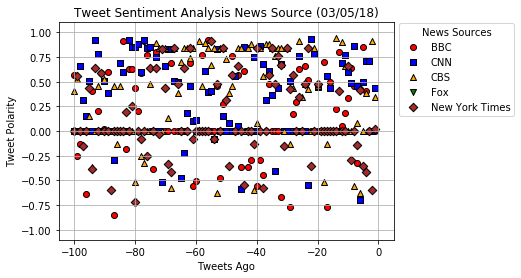

In [34]:
# Prepare scatter plots

plt.scatter(np.arange(-len(df[df["Source"]=="BBC"]),0,1),df[df["Source"]=="BBC"]["Compounded Score"],
            edgecolor="black",marker="o",color="red",label="BBC")
plt.scatter(np.arange(-len(df[df["Source"]=="CBS"]),0,1),df[df["Source"]=="CBS"]["Compounded Score"],
            edgecolor="black",marker="s",color="blue",label="CBS")
plt.scatter(np.arange(-len(df[df["Source"]=="CNN"]),0,1),df[df["Source"]=="CNN"]["Compounded Score"],
            edgecolor="black",marker="^",color="orange",label="CNN")
plt.scatter(np.arange(-len(df[df["Source"]=="FoxNews"]),0,1),
            df[df["Source"]=="fantastic ms."]["Compounded Score"],edgecolor="black",marker="v",color="green",
            label="Fox")
plt.scatter(np.arange(-len(df[df["Source"]=="The New York Times"]),0,1),
            df[df["Source"]=="The New York Times"]["Compounded Score"],edgecolor="black",marker="D", color="brown",
            label="New York Times")

# Incorporate the other graph properties

plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.title("Tweet Sentiment Analysis News Source (%s)" % time.strftime("%x"))

plt.xlim([-105,5])
plt.ylim([-1.1, 1.1])
plt.grid(True)

# Create a legend outside the box, by using a reference to anchor point
# Give a name to it so that later can be called by the function "bbox_extra_artists"
legend=plt.legend(("BBC","CNN","CBS","Fox","New York Times"),title="News Sources",bbox_to_anchor=(1,1.02))

# Export chart to the output folder, including considering that the box would be cut if the indicated additions
# are not made

KKK = str(time.strftime("%m-%d-%y"))+"-Scatter-Plot.png"
plt.savefig("output/" + KKK,bbox_extra_artists=(legend,),bbox_inches='tight')

# Show plot
plt.show()

In [35]:
# OVERALL SENTIMENT ANALYSIS BY NEWS SOURCE

# Create dataframe that calculate the overall compounded score to place on the y axis

KKK = df.groupby(["Source"]).mean()["Compounded Score"]
overallDF = pd.DataFrame.from_dict(KKK)
overallDF["Compounded Score"]

Source
BBC                   0.134859
CBS                   0.326577
CNN                   0.326633
Fox News              0.119550
The New York Times    0.143571
Name: Compounded Score, dtype: float64

In [36]:
# Rounding the numbers to two decimals

roundedDF=np.around(overallDF, decimals=2)
roundedDF["Compounded Score"]

Source
BBC                   0.13
CBS                   0.33
CNN                   0.33
Fox News              0.12
The New York Times    0.14
Name: Compounded Score, dtype: float64

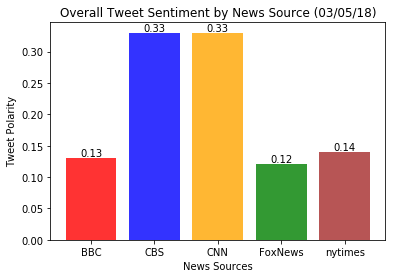

In [37]:
# Bar chart

plt.bar(sources,roundedDF["Compounded Score"],color=("red","blue","orange","green","brown"),alpha=(0.8))

plt.xlabel("News Sources")
plt.ylabel("Tweet Polarity")
plt.title("Overall Tweet Sentiment by News Source (%s)" % time.strftime("%x"))

# Values on top of bars

x=np.arange(len(roundedDF["Compounded Score"]))
for i,j in zip(x,roundedDF["Compounded Score"]):
    plt.text(i,j,str(j),ha="center",va="bottom")

# Export chart to the output folder
    
KKK = str(time.strftime("%m-%d-%y"))+"-Bar-Chart.png"
plt.savefig("output/" + KKK)

# Show plot
plt.show()